In [74]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from colorama import Fore, Style

The train picked most passengers from station: S
DataFrame Head:
   survived  pclass     sex   age  sibsp  parch   fare station
0         0       3    male  22.0      1      0   7.25       S
1         1       1  female  38.0      1      0  71.28       C
2         1       3  female  26.0      0      0   7.92       S
3         1       1  female  35.0      1      0  53.10       S
4         0       3    male  35.0      0      0   8.05       S

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   station   712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usag

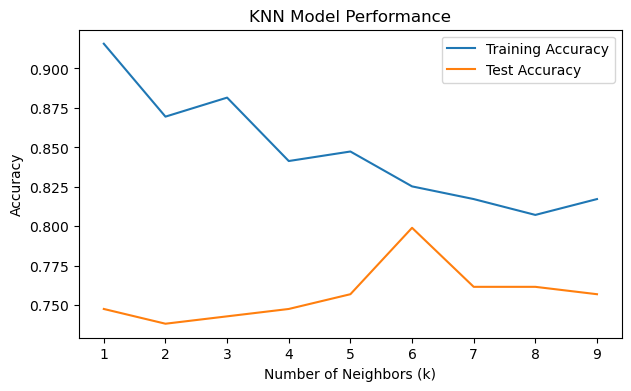

The best value of k is 6
Train set accuracy:  0.8253012048192772
Test set accuracy:  0.7990654205607477

Train set accuracy:  0.785140562248996
Test set accuracy:  0.8271028037383178



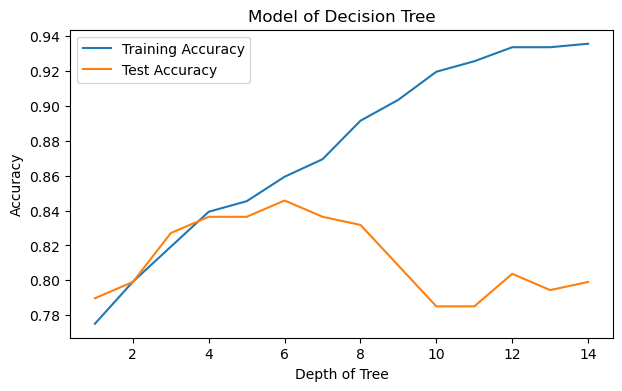

The best depth of the tree is : 6
Train set accuracy:  0.8594377510040161
Test set accuracy:  0.8457943925233645



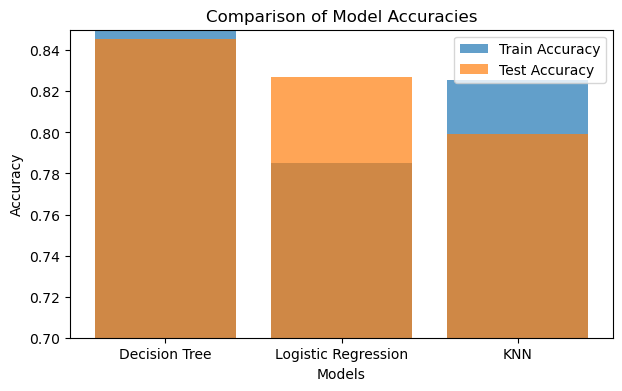

Based on the comparison:
- Decision Tree has the highest test accuracies in train as well as test.
-After that Logistic Regression has good accuracy as well but its training accuracy is worse than test.
- KNN has the lowest test accuracy and may overfit the data.

Therefore, the Decision Tree model is recommended as the best choice for classifying the data.


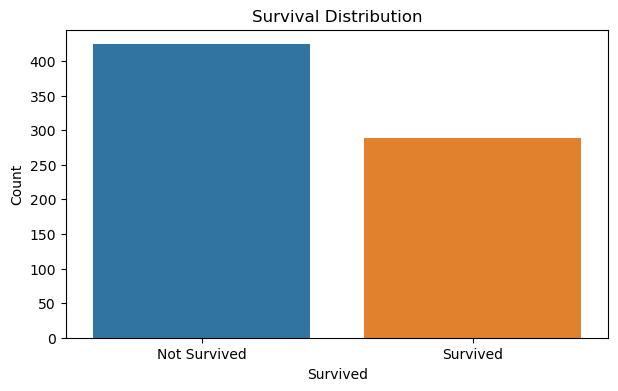

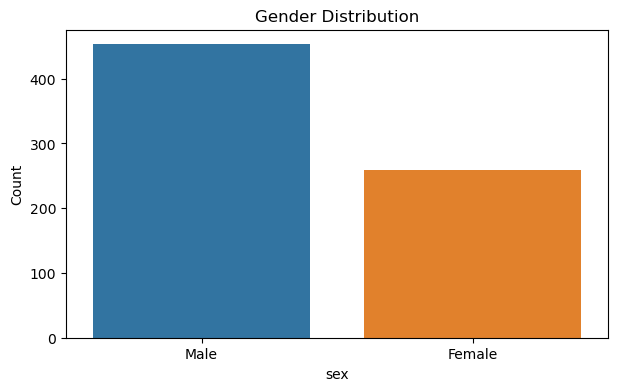

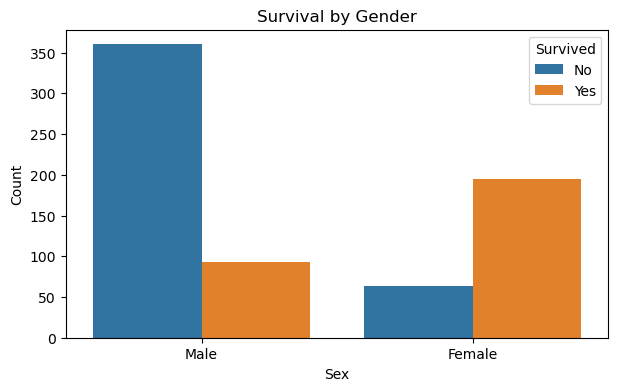

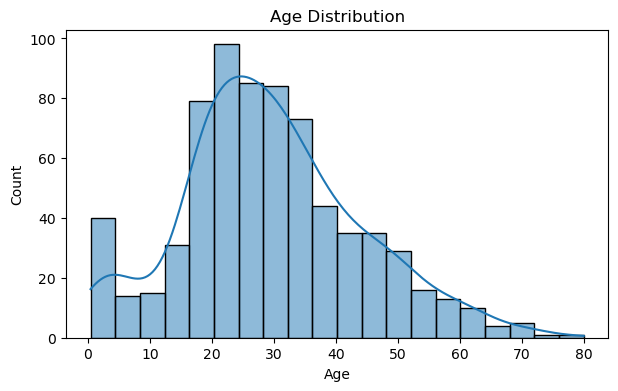

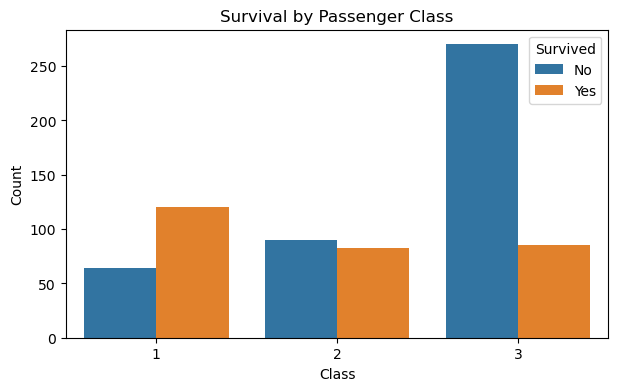

In [79]:
class TrainCrashModelling:
    
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.rawdata = ""
        self.cleaned_data = ""
        
    def load_data(self):
        self.rawdata = pd.read_csv(self.dataset_path)
    
    def clean_data(self):
        self.cleaned_data = self.rawdata.dropna()
        
    def count_clean_records(self):
        return len(self.cleaned_data)
    
    def most_common_station(self):
        counts_in_station = self.cleaned_data['station'].value_counts()
        Most_common_station = counts_in_station.idxmax()
        return Most_common_station
    
    def explore_data(self):
        print(Style.BRIGHT + "DataFrame Head:" + Style.NORMAL)
        print(self.cleaned_data.head().round(2))
        print(Style.BRIGHT + "\nDataFrame Info:"+ Style.NORMAL)
        print(self.cleaned_data.info())
        print(Style.BRIGHT +"\nData Description:"+ Style.NORMAL)
        print(self.cleaned_data.describe().round(2))
        print(Style.BRIGHT +"\nUnique Values Count:"+ Style.NORMAL)
        print(self.cleaned_data.nunique())
        
    def transform_data(self):
        self.cleaned_data['sex_binary'] = self.cleaned_data.sex.map({'male':0,"female":1})
        self.cleaned_data['station_C_binary'] = self.cleaned_data.station.map({'S':0,'C':1,'Q':0})
        self.cleaned_data['station_S_binary'] = self.cleaned_data.station.map({'S':1,'C':0,'Q':1}) 
        self.cleaned_data.drop(columns=['sex', 'station'], inplace=True)
        print( self.cleaned_data.head())
        
    def select_factors(self):
        import warnings
        warnings.filterwarnings("ignore")
        self.X = self.cleaned_data[['pclass', 'sex_binary', 'age', 'sibsp', 'parch', 'fare', 'station_C_binary', 'station_S_binary']]
        from statsmodels.api import add_constant
        X = add_constant(self.X)
        Y = self.cleaned_data.survived
        from statsmodels.api import Logit
        logreg1 = Logit(Y, X).fit()
        return logreg1.summary()
        
    def outliers(self):
        standard_deviation = self.cleaned_data.age.std()
        round(standard_deviation,3)
        Outliers = self.cleaned_data[(self.cleaned_data.age < (-standard_deviation*3)) | (self.cleaned_data.age > (standard_deviation*3))]
        print(Outliers)
        
        
    def split_data(self):
        X = self.cleaned_data[['pclass','sex_binary', 'age', 'sibsp']]
        y = self.cleaned_data ['survived']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, train_size=0.7, test_size=0.3, random_state=12345)
    
    def build_knn_model(self):
        training_accuracy = []
        test_accuracy = []
        neighbors_settings = range(1,10)
        from sklearn.neighbors import KNeighborsClassifier
        
        for n_neigh in neighbors_settings:
            modelfit = sk.neighbors.KNeighborsClassifier(n_neighbors=n_neigh)
            modelfit.fit(self.X_train, self.y_train)
            training_accuracy.append(modelfit.score(self.X_train, self.y_train))
            test_accuracy.append(modelfit.score(self.X_test, self.y_test))
            
        plt.figure(figsize=(7, 4))
        plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
        plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
        plt.xlabel("Number of Neighbors (k)")
        plt.ylabel("Accuracy")
        plt.title("KNN Model Performance")
        plt.legend()
        plt.show()
        print("The best value of k is 6")

    def k_value(self):
        modelfit = KNeighborsClassifier(n_neighbors=6)
        modelfit.fit(self.X_train, self.y_train)
        print("Train set accuracy: ", modelfit.score(self.X_train, self.y_train))
        print("Test set accuracy: ", modelfit.score(self.X_test, self.y_test))    
        
    def build_logistic_regression_model(self):
        logistic_model = LogisticRegression()
        logistic_model.fit(self.X_train, self.y_train)    
        print("Train set accuracy: ", logistic_model.score(self.X_train, self.y_train))
        print("Test set accuracy: ", logistic_model.score(self.X_test, self.y_test))
        
    def build_decision_tree_model(self): 
        tree_training_accuracy = []
        tree_test_accuracy = []
        
        tree_depth = range(1,15)
        
        for elements in tree_depth:
            treeMod = DecisionTreeClassifier(max_depth=elements, random_state=8)
            treeMod.fit(self.X_train, self.y_train)
            tree_training_accuracy.append(treeMod.score(self.X_train, self.y_train))
            tree_test_accuracy.append(treeMod.score(self.X_test, self.y_test))
        
        plt.figure(figsize=(7, 4))
        plt.plot(tree_depth, tree_training_accuracy, label = "Training Accuracy")
        plt.plot(tree_depth, tree_test_accuracy, label = "Test Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Depth of Tree")
        plt.title("Model of Decision Tree")
        plt.legend()
        plt.show()
        print("The best depth of the tree is :",6 )
        
    def decision_tree(self):
        treeMod = DecisionTreeClassifier(max_depth=6, random_state=8)
        treeMod.fit(self.X_train, self.y_train)
        print("Train set accuracy: ", treeMod.score(self.X_train, self.y_train))
        print("Test set accuracy: ", treeMod.score(self.X_test, self.y_test))
        
    def final_model(self):
        models = ['Decision Tree', 'Logistic Regression', 'KNN']
        train_accuracies = [0.8594, 0.7851, 0.8253]
        test_accuracies = [0.8457, 0.8271, 0.7990]

        plt.figure(figsize=(7, 4))
        plt.bar(models, train_accuracies, label='Train Accuracy', alpha=0.7)
        plt.bar(models, test_accuracies, label='Test Accuracy', alpha=0.7)

        plt.xlabel('Models')
        plt.ylabel('Accuracy')
        plt.title('Comparison of Model Accuracies')
        plt.ylim(0.7, 0.85)
        plt.legend()
        plt.show()
        
        print(Style.BRIGHT + Fore.RED + "Based on the comparison:")
        print("- Decision Tree has the highest test accuracies in train as well as test.")
        print("-After that Logistic Regression has good accuracy as well but its training accuracy is worse than test.")
        print("- KNN has the lowest test accuracy and may overfit the data.")
        print("\nTherefore, the Decision Tree model is recommended as the best choice for classifying the data."+Style.NORMAL)
        
    def plot_survival_distribution(self):
        plt.figure(figsize=(7, 4))
        sns.countplot(x='survived', data=self.cleaned_data)
        plt.title('Survival Distribution')
        plt.xlabel('Survived')
        plt.ylabel('Count')
        plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
        plt.show()
        
    def plot_sex_distribution(self):
        plt.figure(figsize=(7, 4))
        sns.countplot(x='sex_binary', data=self.cleaned_data)
        plt.title('Gender Distribution')
        plt.xlabel('sex')
        plt.ylabel('Count')
        plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
        plt.show()
        
        
    def plot_survival_by_sex(self):
        plt.figure(figsize=(7, 4))
        sns.countplot(x='sex_binary', hue='survived', data=self.cleaned_data)
        plt.title('Survival by Gender')
        plt.xlabel('Sex')
        plt.ylabel('Count')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
        plt.show()
        
        
    def plot_age_distribution(self):
        plt.figure(figsize=(7, 4))
        sns.histplot(data=self.cleaned_data, x='age', bins=20, kde=True)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.show()

        
    def plot_survival_by_class(self):
        plt.figure(figsize=(7, 4))
        sns.countplot(x='pclass', hue='survived', data=self.cleaned_data)
        plt.title('Survival by Passenger Class')
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.show()
        
        
object = TrainCrashModelling("TrainData.csv")
object.load_data()
object.clean_data()
object.count_clean_records()
print("The train picked most passengers from station:", object.most_common_station())
object.explore_data()
print(object.transform_data())

print(object.select_factors(), "\n I'm dropping Parch, Station and Fare since their p-values are >0.05")

object.outliers()
object.split_data()
object.build_knn_model()
object.k_value()
print()
object.build_logistic_regression_model()
print()
object.build_decision_tree_model()

object.decision_tree()
print()
object.final_model()

object.plot_survival_distribution()
object.plot_sex_distribution()

object.plot_survival_by_sex()

object.plot_age_distribution()

object.plot_survival_by_class()